In [1]:
import os, cv2, random
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
%matplotlib inline 

from keras.models import Sequential
from keras.layers import Dropout, Flatten, Convolution2D, MaxPooling2D, ZeroPadding2D, Dense, Activation
from keras.optimizers import RMSprop, Adam
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
from keras import backend as K

# image proccesssing 
from PIL import Image
from StringIO import StringIO
import requests
import numpy as np
import PIL
from resizeimage import resizeimage

Using Theano backend.


In [2]:
TRAIN_DIR = '/DATA/TRAIN/'
TEST_DIR = '/DATA/TEST/'


FISH_CLASSES = ['ALB', 'BET', 'DOL', 'LAG', 'Nof', 'OTHER', 'SHARK', 'YFT']
ROWS = 90  #720
COLS = 160 #1280
CHANNELS = 3

In [3]:
%matplotlib inline
def get_images(fish):
    """Load files from train folder"""
    fish_dir = TRAIN_DIR+'{}'.format(fish)
    images = [fish+'/'+im for im in os.listdir(fish_dir)]
    return images

def read_image(src):
    """Read and resize individual images"""
    im = cv2.imread(src, cv2.IMREAD_COLOR)
    im = cv2.resize(im, (COLS, ROWS), interpolation=cv2.INTER_CUBIC)
    return im


files = []
y_all = []
results = []

for fish in FISH_CLASSES:
    fish_files = get_images(fish)
    files.extend(fish_files)
    
    y_fish = np.tile(fish, len(fish_files))
    y_all.extend(y_fish)
    print("{0} photos of {1}".format(len(fish_files), fish))
    hist = np.histogram(len(fish_files))
    plt.hist
    plt.show()
    #print len(fish_files)
    results.append(len(fish_files))
    
    
y_all = np.array(y_all)
print results
hist = np.histogram(results)
plt.hist
plt.show()

1719 photos of ALB
200 photos of BET
117 photos of DOL
67 photos of LAG
465 photos of Nof
299 photos of OTHER
176 photos of SHARK
734 photos of YFT
[1719, 200, 117, 67, 465, 299, 176, 734]


[1719, 200, 117, 67, 465, 299, 176, 734]
['ALB', 'BET', 'DOL', 'LAG', 'Nof', 'OTHER', 'SHARK', 'YFT']


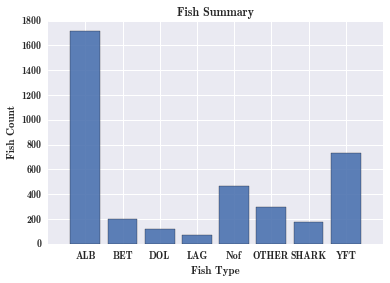

In [5]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
#x = np.random.normal(size = 1000)
print results
print FISH_CLASSES
#plt.hist(results, orientation=u'horizontal')
#plt.xticks(results , FISH_CLASSES)
#plt.gca().invert_xaxis()
y_pos = np.arange(len(FISH_CLASSES))
plt.bar(y_pos, results, align='center', alpha=0.9)
plt.xticks(y_pos, FISH_CLASSES)
plt.ylabel('Fish Count')
plt.xlabel('Fish Type')
plt.title('Fish Summary')

In [6]:
X_all = np.ndarray((len(files), ROWS, COLS, CHANNELS), dtype=np.uint8)

for i, im in enumerate(files): 
    X_all[i] = read_image(TRAIN_DIR+im)
    if i%1000 == 0: print('Processed {} of {}'.format(i, len(files)))

print(X_all.shape)

Processed 0 of 3777
Processed 1000 of 3777
Processed 2000 of 3777
Processed 3000 of 3777
(3777, 90, 160, 3)


In [7]:
# One Hot Encoding Labels
y_all = LabelEncoder().fit_transform(y_all)
y_all = np_utils.to_categorical(y_all)

X_train, X_valid, y_train, y_valid = train_test_split(X_all, y_all, 
                                                    test_size=0.2, random_state=23, 
                                                    stratify=y_all)

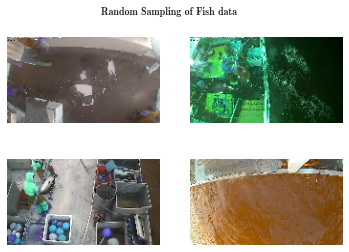

In [8]:
%matplotlib inline
import struct
from numpy import *
from matplotlib.pyplot import *

# Get the figure and axes.
fig, axes = subplots(2, 2)
axes = axes.reshape(4)
fig.suptitle("Random Sampling of Fish data")

# Plot random images.
indices = random.randint(len(X_train), size=4)
for axis, index in zip(axes, indices):
    image = X_train[index, :, :]
    axis.get_xaxis().set_visible(False)
    axis.get_yaxis().set_visible(False)
    axis.imshow(image,cmap = cm.Greys_r)

In [8]:
optimizer = RMSprop(lr=1e-4)
objective = 'categorical_crossentropy'

def center_normalize(x):
    return (x - K.mean(x)) / K.std(x)

model = Sequential()

model.add(Activation(activation=center_normalize, input_shape=(ROWS, COLS, CHANNELS)))

model.add(Convolution2D(60, 5, 5, border_mode='same', activation='relu'))
#model.add(Convolution2D(10, 5, 5, border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(12, 3, 3, border_mode='same', activation='relu'))
#model.add(Convolution2D(6, 3, 3, border_mode='same', activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))

#model.add(Convolution2D(128, 3, 3, border_mode='same', activation='relu', dim_ordering='tf'))
#model.add(Convolution2D(128, 3, 3, border_mode='same', activation='relu', dim_ordering='tf'))
#model.add(MaxPooling2D(pool_size=(2, 2), dim_ordering='tf'))

#model.add(Convolution2D(256, 3, 3, border_mode='same', activation='relu', dim_ordering='tf'))
#model.add(Convolution2D(256, 3, 3, border_mode='same', activation='relu', dim_ordering='tf'))
#model.add(MaxPooling2D(pool_size=(2, 2), dim_ordering='tf'))


model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(len(FISH_CLASSES)))
model.add(Activation('sigmoid'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#model.compile(loss=objective, optimizer=optimizer)

In [10]:
def create_model(optimizer='rmsprop', init='glorot_uniform'):
   model = Sequential()
   model.add(Activation(activation=center_normalize, input_shape=(ROWS, COLS, CHANNELS)))
   model.add(Convolution2D(60, 5, 5, border_mode='same', activation='relu'))
   #model.add(Convolution2D(12, 5, 5, border_mode='same', activation='relu'))
   model.add(MaxPooling2D(pool_size=(2, 2)))
   model.add(Convolution2D(12, 3, 3, border_mode='same', activation='relu'))
   #model.add(Convolution2D(6, 3, 3, border_mode='same', activation='relu'))
   #model.add(MaxPooling2D(pool_size=(2, 2), dim_ordering='tf'))
   #model.add(Convolution2D(128, 3, 3, border_mode='same', activation='relu', dim_ordering='tf'))
   #model.add(Convolution2D(128, 3, 3, border_mode='same', activation='relu', dim_ordering='tf'))
   #model.add(MaxPooling2D(pool_size=(2, 2), dim_ordering='tf'))
   #model.add(Convolution2D(256, 3, 3, border_mode='same', activation='relu', dim_ordering='tf'))
   #model.add(Convolution2D(256, 3, 3, border_mode='same', activation='relu', dim_ordering='tf'))
   #model.add(MaxPooling2D(pool_size=(2, 2), dim_ordering='tf'))
   model.add(Flatten())
   model.add(Dense(128, activation='relu'))
   model.add(Dropout(0.5))
   model.add(Dense(50, activation='relu'))
   model.add(Dropout(0.5))
   model.add(Dense(len(FISH_CLASSES)))
   model.add(Activation('sigmoid'))
   model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
   #model.compile(loss=objective, optimizer=optimizer)
   return model

In [12]:
# start timing 
model = create_model(optimizer='rmsprop', init='glorot_uniform')
def center_normalize(x):
    return (x - K.mean(x)) / K.std(x)
#model = cnn_model()
import timeit
start_time = timeit.default_timer()

X_test =  X_valid
y_test = y_valid

# build the model
#model = cnn_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=10, batch_size=32,
verbose=2)
# Final evaluationof the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Large CNN Error: %.2f%%" % (100-scores[1]*100))

#ending time
elapsed = timeit.default_timer() - start_time
print ("Time Elapsed :",elapsed)

Train on 3021 samples, validate on 756 samples
Epoch 1/10
109s - loss: 1.7335 - acc: 0.4098 - val_loss: 1.4622 - val_acc: 0.4722
Epoch 2/10
106s - loss: 1.4444 - acc: 0.4826 - val_loss: 1.0752 - val_acc: 0.5476
Epoch 3/10
111s - loss: 1.2894 - acc: 0.5356 - val_loss: 0.9549 - val_acc: 0.6085
Epoch 4/10
107s - loss: 1.1120 - acc: 0.6044 - val_loss: 0.7520 - val_acc: 0.7116
Epoch 5/10
109s - loss: 0.9133 - acc: 0.6826 - val_loss: 0.5716 - val_acc: 0.7725
Epoch 6/10
109s - loss: 0.7673 - acc: 0.7388 - val_loss: 0.5133 - val_acc: 0.8320
Epoch 7/10
109s - loss: 0.6754 - acc: 0.7805 - val_loss: 0.4411 - val_acc: 0.8638
Epoch 8/10
108s - loss: 0.5130 - acc: 0.8355 - val_loss: 0.3403 - val_acc: 0.8862
Epoch 9/10
106s - loss: 0.4535 - acc: 0.8613 - val_loss: 0.3033 - val_acc: 0.9114
Epoch 10/10
107s - loss: 0.3803 - acc: 0.8798 - val_loss: 0.2726 - val_acc: 0.9087
Large CNN Error: 9.13%
('Time Elapsed :', 1101.6561951637268)


In [39]:
def create_model2(optimizer='rmsprop', init='glorot_uniform'):
   model = Sequential()
   model.add(Activation(activation=center_normalize, input_shape=(ROWS, COLS, CHANNELS)))

   #model.add(Convolution2D(32, 5, 5, border_mode='same', activation='relu'))
   model.add(Convolution2D(16, 5, 5, border_mode='same', activation='relu', dim_ordering='tf'))
   model.add(MaxPooling2D(pool_size=(2, 2)))

   model.add(Convolution2D(32, 3, 3, border_mode='same', activation='relu'))
   #model.add(Convolution2D(64, 3, 3, border_mode='same', activation='relu', dim_ordering='tf'))
   model.add(MaxPooling2D(pool_size=(2, 2)))

   model.add(Convolution2D(64, 3, 3, border_mode='same', activation='relu'))
   #model.add(Convolution2D(128, 3, 3, border_mode='same', activation='relu', dim_ordering='tf'))
   model.add(MaxPooling2D(pool_size=(2, 2)))

   #model.add(Convolution2D(256, 3, 3, border_mode='same', activation='relu'))
   #model.add(Convolution2D(256, 3, 3, border_mode='same', activation='relu', dim_ordering='tf'))
   #model.add(MaxPooling2D(pool_size=(2, 2)))


   model.add(Flatten())
   model.add(Dense(64, activation='relu'))
   model.add(Dropout(0.5))

   model.add(Dense(64, activation='relu'))
   model.add(Dropout(0.5))

   model.add(Dense(len(FISH_CLASSES)))
   model.add(Activation('sigmoid'))
   model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
   #model.compile(loss=objective, optimizer=optimizer)
   return model

In [40]:
# start timing 
model = create_model2(optimizer='rmsprop', init='glorot_uniform')
def center_normalize(x):
    return (x - K.mean(x)) / K.std(x)
#model = cnn_model()
import timeit
start_time = timeit.default_timer()

X_test =  X_valid
y_test = y_valid

# build the model
#model = cnn_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=10, batch_size=32,
verbose=2)
# Final evaluationof the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Large CNN Error: %.2f%%" % (100-scores[1]*100))

#ending time
elapsed = timeit.default_timer() - start_time
print ("Time Elapsed :",elapsed)

Train on 3021 samples, validate on 756 samples
Epoch 1/10
139s - loss: 1.8087 - acc: 0.3764 - val_loss: 1.5504 - val_acc: 0.4616
Epoch 2/10
135s - loss: 1.5893 - acc: 0.4436 - val_loss: 1.4052 - val_acc: 0.4669
Epoch 3/10
113s - loss: 1.4230 - acc: 0.4681 - val_loss: 1.1031 - val_acc: 0.5291
Epoch 4/10
111s - loss: 1.2791 - acc: 0.5118 - val_loss: 0.9538 - val_acc: 0.6481
Epoch 5/10
109s - loss: 1.1221 - acc: 0.5498 - val_loss: 0.7669 - val_acc: 0.6971
Epoch 6/10
107s - loss: 0.9648 - acc: 0.6309 - val_loss: 0.6063 - val_acc: 0.7870
Epoch 7/10
107s - loss: 0.8400 - acc: 0.6839 - val_loss: 0.5009 - val_acc: 0.8307
Epoch 8/10
108s - loss: 0.7114 - acc: 0.7306 - val_loss: 0.4428 - val_acc: 0.8280
Epoch 9/10
108s - loss: 0.6479 - acc: 0.7656 - val_loss: 0.3591 - val_acc: 0.8862
Epoch 10/10
108s - loss: 0.5568 - acc: 0.7961 - val_loss: 0.2936 - val_acc: 0.9167
Large CNN Error: 8.33%
('Time Elapsed :', 1161.669270992279)


In [ ]:
from keras.optimizers import SGD, RMSprop, Adagrad, Adadelta, Adam
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
import requests
##
import numpy

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load pima indians dataset
#dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X, Y = X_train, y_train 
#X = dataset[:,0:8]
#Y = dataset[:,8]
# create model
model = KerasClassifier(build_fn=create_model2, verbose=0)
# grid search epochs, batch size and optimizer
optimizers = ['rmsprop', 'adam']
init = ['glorot_uniform', 'normal', 'uniform']
epochs = numpy.array([10, 10, 10])
batches = numpy.array([8, 16, 32])
param_grid = dict(optimizer=optimizers, nb_epoch=epochs, batch_size=batches, init = init)
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
for params, mean_score, scores in grid_result.grid_scores_:
    print("%f (%f) with: %r" % (scores.mean(), scores.std(), params))

In [9]:
# start timing 
model = create_model
def center_normalize(x):
    return (x - K.mean(x)) / K.std(x)
#model = cnn_model()
import timeit
start_time = timeit.default_timer()

X_test =  X_valid
y_test = y_valid

# build the model
#model = cnn_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=10, batch_size=32,
verbose=2)
# Final evaluationof the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Large CNN Error: %.2f%%" % (100-scores[1]*100))

#ending time
elapsed = timeit.default_timer() - start_time
print ("Time Elapsed :",elapsed)

Train on 3021 samples, validate on 756 samples
Epoch 1/10
116s - loss: 1.7443 - acc: 0.3873 - val_loss: 1.3286 - val_acc: 0.5648
Epoch 2/10
114s - loss: 1.4364 - acc: 0.4912 - val_loss: 1.0356 - val_acc: 0.6019
Epoch 3/10
109s - loss: 1.1984 - acc: 0.5793 - val_loss: 0.8837 - val_acc: 0.6680
Epoch 4/10
100s - loss: 1.0380 - acc: 0.6382 - val_loss: 0.6863 - val_acc: 0.7579
Epoch 5/10
99s - loss: 0.8548 - acc: 0.7107 - val_loss: 0.5649 - val_acc: 0.8095
Epoch 6/10
113s - loss: 0.7349 - acc: 0.7521 - val_loss: 0.4732 - val_acc: 0.8399
Epoch 7/10
114s - loss: 0.5909 - acc: 0.8103 - val_loss: 0.3620 - val_acc: 0.8823
Epoch 8/10
115s - loss: 0.5061 - acc: 0.8424 - val_loss: 0.2984 - val_acc: 0.9008
Epoch 9/10
119s - loss: 0.4558 - acc: 0.8577 - val_loss: 0.2679 - val_acc: 0.9325
Epoch 10/10
111s - loss: 0.3757 - acc: 0.8838 - val_loss: 0.2504 - val_acc: 0.9259
Large CNN Error: 7.41%
('Time Elapsed :', 1131.995749950409)


In [15]:
from keras.preprocessing.image import ImageDataGenerator
# this will do preprocessing and realtime data augmentation
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=True,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

####  trains the neural network using the transformed images;
#np.expand_dims(Y_train, -1)
# fits the model on batches with real-time data augmentation:
model.fit_generator(datagen.flow(X_train, y_train, batch_size=32),
                    samples_per_epoch=len(X_train), nb_epoch=10)

Epoch 1/10
3021/3021 [==============================] - 151s - loss: 1.6866 - acc: 0.4690   
Epoch 2/10
3021/3021 [==============================] - 97s - loss: 1.4448 - acc: 0.5362    
Epoch 3/10
3021/3021 [==============================] - 113s - loss: 1.3548 - acc: 0.5528   
Epoch 4/10
3021/3021 [==============================] - 110s - loss: 1.2380 - acc: 0.5958   
Epoch 5/10
3021/3021 [==============================] - 97s - loss: 1.1265 - acc: 0.6197    
Epoch 6/10
3021/3021 [==============================] - 110s - loss: 1.0648 - acc: 0.6485   
Epoch 7/10
3021/3021 [==============================] - 104s - loss: 1.0556 - acc: 0.6461   
Epoch 8/10
3021/3021 [==============================] - 107s - loss: 0.9622 - acc: 0.6726   
Epoch 9/10
3021/3021 [==============================] - 99s - loss: 0.9194 - acc: 0.6806    
Epoch 10/10
3021/3021 [==============================] - 98s - loss: 0.8737 - acc: 0.7084    


In [16]:
optimizer = RMSprop(lr=1e-4)
objective = 'categorical_crossentropy'

def center_normalize(x):
    return (x - K.mean(x)) / K.std(x)

def create_model(optimizer='rmsprop', init='glorot_uniform'):
   model = Sequential()
   model.add(Activation(activation=center_normalize, input_shape=(ROWS, COLS, CHANNELS)))
   model.add(Convolution2D(60, 5, 5, border_mode='same', activation='relu'))
   #model.add(Convolution2D(12, 5, 5, border_mode='same', activation='relu'))
   model.add(MaxPooling2D(pool_size=(2, 2)))
   model.add(Convolution2D(6, 3, 3, border_mode='same', activation='relu'))
   #model.add(Convolution2D(6, 3, 3, border_mode='same', activation='relu'))
   #model.add(MaxPooling2D(pool_size=(2, 2), dim_ordering='tf'))
   #model.add(Convolution2D(128, 3, 3, border_mode='same', activation='relu', dim_ordering='tf'))
   #model.add(Convolution2D(128, 3, 3, border_mode='same', activation='relu', dim_ordering='tf'))
   #model.add(MaxPooling2D(pool_size=(2, 2), dim_ordering='tf'))
   #model.add(Convolution2D(256, 3, 3, border_mode='same', activation='relu', dim_ordering='tf'))
   #model.add(Convolution2D(256, 3, 3, border_mode='same', activation='relu', dim_ordering='tf'))
   #model.add(MaxPooling2D(pool_size=(2, 2), dim_ordering='tf'))
   model.add(Flatten())
   model.add(Dense(128, activation='relu'))
   model.add(Dropout(0.5))
   model.add(Dense(50, activation='relu'))
   model.add(Dropout(0.5))
   model.add(Dense(len(FISH_CLASSES)))
   model.add(Activation('sigmoid'))
   model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
   #model.compile(loss=objective, optimizer=optimizer)
   return model

In [17]:
from keras.optimizers import SGD, RMSprop, Adagrad, Adadelta, Adam
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
import requests
##
import numpy

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load pima indians dataset
#dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X, Y = X_train, y_train 
#X = dataset[:,0:8]
#Y = dataset[:,8]
# create model
model = KerasClassifier(build_fn=create_model, verbose=0)
# grid search epochs, batch size and optimizer
optimizers = ['rmsprop', 'adam']
init = ['glorot_uniform', 'normal', 'uniform']
epochs = numpy.array([10, 10, 10])
batches = numpy.array([8, 16, 32])
param_grid = dict(optimizer=optimizers, nb_epoch=epochs, batch_size=batches, init = init)
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
for params, mean_score, scores in grid_result.grid_scores_:
    print("%f (%f) with: %r" % (scores.mean(), scores.std(), params))

Best: 0.842105 using {'init': 'uniform', 'optimizer': 'adam', 'nb_epoch': 10, 'batch_size': 16}
0.833499 (0.018064) with: {'init': 'glorot_uniform', 'optimizer': 'rmsprop', 'nb_epoch': 10, 'batch_size': 8}
0.811652 (0.020709) with: {'init': 'glorot_uniform', 'optimizer': 'adam', 'nb_epoch': 10, 'batch_size': 8}
0.802714 (0.018245) with: {'init': 'glorot_uniform', 'optimizer': 'rmsprop', 'nb_epoch': 10, 'batch_size': 8}
0.805362 (0.013543) with: {'init': 'glorot_uniform', 'optimizer': 'adam', 'nb_epoch': 10, 'batch_size': 8}
0.783515 (0.029268) with: {'init': 'glorot_uniform', 'optimizer': 'rmsprop', 'nb_epoch': 10, 'batch_size': 8}
0.796425 (0.041240) with: {'init': 'glorot_uniform', 'optimizer': 'adam', 'nb_epoch': 10, 'batch_size': 8}
0.798742 (0.022017) with: {'init': 'normal', 'optimizer': 'rmsprop', 'nb_epoch': 10, 'batch_size': 8}
0.826548 (0.019465) with: {'init': 'normal', 'optimizer': 'adam', 'nb_epoch': 10, 'batch_size': 8}
0.817610 (0.032192) with: {'init': 'normal', 'optimi

/usr/local/lib/python2.7/dist-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [15]:
# start timing 
def center_normalize(x):
    return (x - K.mean(x)) / K.std(x)
#model = cnn_model()
import timeit
start_time = timeit.default_timer()

X_test =  X_valid
y_test = y_valid

# build the model
#model = cnn_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=10, batch_size=32,
verbose=2)
# Final evaluationof the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Large CNN Error: %.2f%%" % (100-scores[1]*100))

#ending time
elapsed = timeit.default_timer() - start_time
print ("Time Elapsed :",elapsed)

Train on 3021 samples, validate on 756 samples
Epoch 1/10
2817s - loss: 1.7686 - acc: 0.3757 - val_loss: 1.4523 - val_acc: 0.4934
Epoch 2/10
2925s - loss: 1.4897 - acc: 0.4743 - val_loss: 1.2087 - val_acc: 0.5146
Epoch 3/10
2675s - loss: 1.3217 - acc: 0.5257 - val_loss: 1.0269 - val_acc: 0.6005
Epoch 4/10
1697s - loss: 1.1555 - acc: 0.5690 - val_loss: 0.8593 - val_acc: 0.6746
Epoch 5/10
1844s - loss: 0.9782 - acc: 0.6435 - val_loss: 0.6928 - val_acc: 0.7341
Epoch 6/10
3003s - loss: 0.8502 - acc: 0.6981 - val_loss: 0.5869 - val_acc: 0.8241
Epoch 7/10
2857s - loss: 0.7096 - acc: 0.7567 - val_loss: 0.4872 - val_acc: 0.8519
Epoch 8/10
2680s - loss: 0.6164 - acc: 0.7944 - val_loss: 0.4946 - val_acc: 0.8532
Epoch 9/10
2551s - loss: 0.5142 - acc: 0.8272 - val_loss: 0.3470 - val_acc: 0.9220
Epoch 10/10
1550s - loss: 0.4183 - acc: 0.8603 - val_loss: 0.3588 - val_acc: 0.9008
Large CNN Error: 9.92%
('Time Elapsed :', 24645.627778053284)


In [6]:
optimizer = RMSprop(lr=1e-4)
objective = 'categorical_crossentropy'

def center_normalize(x):
    return (x - K.mean(x)) / K.std(x)

model = Sequential()

model.add(Activation(activation=center_normalize, input_shape=(ROWS, COLS, CHANNELS)))

model.add(Convolution2D(30, 5, 5, border_mode='same', activation='relu', dim_ordering='tf'))
model.add(Convolution2D(30, 5, 5, border_mode='same', activation='relu', dim_ordering='tf'))
model.add(MaxPooling2D(pool_size=(2, 2), dim_ordering='tf'))

model.add(Convolution2D(15, 3, 3, border_mode='same', activation='relu', dim_ordering='tf'))
model.add(Convolution2D(15, 3, 3, border_mode='same', activation='relu', dim_ordering='tf'))
model.add(MaxPooling2D(pool_size=(2, 2), dim_ordering='tf'))

#model.add(Convolution2D(128, 3, 3, border_mode='same', activation='relu', dim_ordering='tf'))
#model.add(Convolution2D(128, 3, 3, border_mode='same', activation='relu', dim_ordering='tf'))
#model.add(MaxPooling2D(pool_size=(2, 2), dim_ordering='tf'))

#model.add(Convolution2D(256, 3, 3, border_mode='same', activation='relu', dim_ordering='tf'))
#model.add(Convolution2D(256, 3, 3, border_mode='same', activation='relu', dim_ordering='tf'))
#model.add(MaxPooling2D(pool_size=(2, 2), dim_ordering='tf'))


model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(len(FISH_CLASSES)))
model.add(Activation('sigmoid'))

model.compile(loss=objective, optimizer=optimizer)

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=4, verbose=1, mode='auto')        
        
model.fit(X_train, y_train, batch_size=64, nb_epoch=1,
              validation_split=0.2, verbose=1, shuffle=True, callbacks=[early_stopping])

WARNING (theano.tensor.blas): We did not found a dynamic library into the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.


In [13]:
preds = model.predict(X_valid, verbose=1)
print("Validation Log Loss: {}".format(log_loss(y_valid, preds)))

WARNING (theano.tensor.blas): We did not found a dynamic library into the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.


756/756 [==============================] - 122s   
Validation Log Loss: 1.60318860323


/usr/local/lib/python2.7/dist-packages/numpy/core/fromnumeric.py:2699: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  VisibleDeprecationWarning)


In [14]:
test_files = [im for im in os.listdir(TEST_DIR)]
test = np.ndarray((len(test_files), ROWS, COLS, CHANNELS), dtype=np.uint8)

for i, im in enumerate(test_files): 
    test[i] = read_image(TEST_DIR+im)
    
test_preds = model.predict(test, verbose=1)

1000/1000 [==============================] - 172s   


In [ ]:
## Uncomment to check out a fish from each class
uniq = np.unique(y_all, return_index=True)
for f, i in zip(uniq[0], uniq[1]):
    plt.imshow(X_all[i])
    plt.title(f)
    plt.show()

In [15]:
submission = pd.DataFrame(test_preds, columns=FISH_CLASSES)
submission.insert(0, 'image', test_files)
submission.head()

,image,ALB,BET,DOL,LAG,NoF,OTHER,SHARK,YFT
0,img_07278.jpg,0.988707,0.132977,0.117991,0.061504,0.425378,0.289866,0.109288,0.758570
1,img_07304.jpg,0.993049,0.107868,0.097451,0.047822,0.429010,0.268903,0.090104,0.779654
2,img_07314.jpg,0.989855,0.126498,0.113956,0.059154,0.424511,0.287187,0.103581,0.765924
3,img_07318.jpg,0.986079,0.143582,0.128031,0.069621,0.435832,0.299033,0.120093,0.751051
4,img_07319.jpg,0.988042,0.133698,0.118891,0.063234,0.436819,0.289418,0.116231,0.756375


In [41]:
# One Hot Encoding Labels
#print y_all
#y_all = LabelEncoder().fit_transform(y_all)
#y_all = np_utils.to_categorical(y_all)

X_train, X_valid, y_train, y_valid = train_test_split(X_all, y_all, 
                                                    test_size=0.2, random_state=23, 
                                                    stratify=y_all)

In [57]:
nb_classes = np.max(y_train)+1
y_train = y_train.astype(int)
y_valid = y_valid.astype(int)
print y_train[1]

[0 1 0 0 0 0 0 0]


In [58]:
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_valid, nb_classes)

In [62]:
optimizer = RMSprop(lr=1e-4)
objective = 'categorical_crossentropy'

def center_normalize(x):
    return (x - K.mean(x)) / K.std(x)

model = Sequential()

model.add(Activation(activation=center_normalize, input_shape=(ROWS, COLS, CHANNELS)))

model.add(Convolution2D(32, 5, 5, border_mode='same', activation='relu', dim_ordering='tf'))
model.add(Convolution2D(32, 5, 5, border_mode='same', activation='relu', dim_ordering='tf'))
model.add(MaxPooling2D(pool_size=(2, 2))

model.add(Convolution2D(64, 3, 3, border_mode='same', activation='relu', dim_ordering='tf'))
model.add(Convolution2D(64, 3, 3, border_mode='same', activation='relu', dim_ordering='tf'))
model.add(MaxPooling2D(pool_size=(2, 2))

model.add(Convolution2D(128, 3, 3, border_mode='same', activation='relu', dim_ordering='tf'))
model.add(Convolution2D(128, 3, 3, border_mode='same', activation='relu', dim_ordering='tf'))
model.add(MaxPooling2D(pool_size=(2, 2))

model.add(Convolution2D(256, 3, 3, border_mode='same', activation='relu', dim_ordering='tf'))
model.add(Convolution2D(256, 3, 3, border_mode='same', activation='relu', dim_ordering='tf'))
model.add(MaxPooling2D(pool_size=(2, 2))


model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(len(FISH_CLASSES)))
model.add(Activation('sigmoid'))

model.compile(loss=objective, optimizer=optimizer)

SyntaxError: invalid syntax (<ipython-input-62-66ae0d5651c3>, line 15)

In [63]:
#early_stopping = EarlyStopping(monitor='val_loss', patience=4, verbose=1, mode='auto')        
        
model.fit(X_train, y_train, batch_size=64, nb_epoch=1, validation_split=0.2, verbose=1)

ERROR (theano.gof.opt): Optimization failure due to: local_abstractconv_check
ERROR (theano.gof.opt): node: AbstractConv2d{border_mode='half', subsample=(1, 1), filter_flip=True, imshp=(None, None, None, None), kshp=(32, 3, 5, 5)}(Elemwise{true_div,no_inplace}.0, DimShuffle{3,2,0,1}.0)
ERROR (theano.gof.opt): TRACEBACK:
ERROR (theano.gof.opt): Traceback (most recent call last):
  File "C:\Users\Simon\Anaconda2\lib\site-packages\theano\gof\opt.py", line 1772, in process_node
    replacements = lopt.transform(node)
  File "C:\Users\Simon\Anaconda2\lib\site-packages\theano\tensor\nnet\opt.py", line 402, in local_abstractconv_check
    node.op.__class__.__name__)
AssertionError: AbstractConv2d Theano optimization failed: there is no implementation available supporting the requested options. Did you exclude both "conv_dnn" and "conv_gemm" from the optimizer? If on GPU, is cuDNN available and does the GPU support it? If on CPU, do you have a BLAS library installed Theano can link against?



AssertionError: AbstractConv2d Theano optimization failed: there is no implementation available supporting the requested options. Did you exclude both "conv_dnn" and "conv_gemm" from the optimizer? If on GPU, is cuDNN available and does the GPU support it? If on CPU, do you have a BLAS library installed Theano can link against?